# Mesa opinion dynamics example - Bounded confidence model

## Description

We present a model of opinion dynamics where agents adjust continuous opinions on the occasion of random binary encounters whenever their difference in opinion is below a given threshold. High thresholds yield convergence of opinions towards an average opinion, but low thresholds result in several opinion clusters: members of the same cluster share the same opinion but do not adjust any more with members of other clusters.

What would happen if opinion were a continuous variable such as the worthiness of a choice (a utility in economics), or some belief about adjustment of a control parameter?

The purpose of this model is to present results about continuous opinion dynamics when convergent opinion adjustments only proceed when opinion difference is below a given threshold.

The rationale for the threshold condition is that agents only interact when their opinion are already close enough; otherwise they do not even bother to discuss. The reason for such behaviour might be for instance lack of understanding, conflicts of interest or social pressure. Although there is no reason to suppose that openness to discussion, here represented by threshold , is constant across population or even symmetrical on the occasion of a binary encounter, we will always take it as a constant simulation parameter in the present model.

The analytical solution (possible for small values of the treshold d) implies that starting from an initial distribution of opinions in the population, any local higher opinion density is amplified. Peaks of opinions increase and valleys are depleted until very narrow peaks remains among a desert of intermediate opinions.

## Sample Model Description

The excercise model is a very simple simulated agent threshold model. The aim of the formal model presented here is the same: to predict, from the initial threshold values, the ultimate number of opinion groups. Mathematically, the question is one of finding an equilibrium in a process occurring over time.

We will explore models concerning:

- Homogeneous mixing across the whole population
- Mixing across a social network (visualized in the Appendix)

The rules of our tutorial model:

1. Start with a population of $N$ agents with $i$ continuous opinions $x_{i}$ (e.g., N = 100)
     - convergence parameter $\mu$ [0, 0.5] (e.g., mu = 0.5)
     - opinion difference threshold $d$ (e.g., d = 0.5)
2. Initially opinions are randomly generated across a **uniform distribution** on [0, 1]
3. At each time step any two randomly chosen agents meet (from the list of all agents). 
4. They re-adjust their opinion when their difference of opinion is smaller in magnitude than a threshold $d$.
5. Opinions are then adjusted according to the formula:
    - $x=x+\mu\cdot(x'-x)$
    - $x'=x'+\mu\cdot(x-x')$

Despite its simplicity, this model yields results that are often unexpected to those not familiar with it. 
The model is filled with a large majority of agents which have reached consensus around x = 0.5 apart from isolated agents which have “extremists” opinions closer to 0 or 1: the importance of extremists is the most noticeable difference with the full mixing case where such 'wings' can apear.

## How to use and modify the code

These excercises are designed around a Mesa template that is given to you to reuse. You are not asked to perform any complex object programming, but instead we ask for understanding of the core features of the Mesa pyhton package. You will mostly have to modifly the existing template and code the ``Model`` and ``Agent``behavior using standard python code.

**Therefore, in this excercise, you are asked to fill your code where the comments state:**

``#[Your code here]``

**IMPORTANT!** 
- The code output should print the values that you use for discussion in the text of the answer, otherwise, we as graders cannot see the values from your simlation run in PDF.
- Upon submitting the PDF notebook, please use the example simulation values already given in the questions. Of course, it is natural that you experiment with different code and simulation values before submission.

Let’s get started.

# 1. Create the Basic Agent/Model

## Setting up the model

To begin writing the model code, we start with two core classes: one for
the overall model, the other for the agents. The model class holds the
model-level attributes, manages the agents, and generally handles the
global level of our model. Each instantiation of the model class will be
a specific model run. Each model will contain multiple agents, all of
which are instantiations of the agent class. Both the model and agent
classes are child classes of Mesa’s generic ``Model`` and ``Agent``
classes.

### At the location ``# 1 Initialization [Your code here]`` you have to implement:

Each agent has only one unique parameter:
- opinion - an agent's initial opinion which will change during the simulation

(Each agent will also have a unique identifier (i.e., a sequence position), stored in the ``unique_id`` variable. Giving each agent a unique id is a good practice when doing agent-based modeling.)

**Note:** Agents should also use the convergence parameter $\mu$ and the opinion difference threshold $d$, but they are constants and can be set once in the model for the whole simulation (and subsequently accessed through e.g., `self.model.convergence`).

### At the location ``# 2 Step agent function`` you have to implement:

- This is the step function of your agent

### At the location ``# 3 Randomly chose agent [Your code here]`` you have to implement:

- Get a list of all scheduled agents
- Select one random agent from the list to interact with

### At the location ``# 4 Evaluate agents difference of opinion [Your code here]`` you have to implement:

- Calculate the **absolute** difference between opinion of the agents in question

### At the location ``# 5 Re-adjust agents opinions [Your code here]`` you have to implement:

- Recalculate both agents' opinions based on the opinion adjustment formula given above, but only if their difference in opinion is lower then the treshold $d$

In [1]:
from mesa import Model, Agent
from mesa.time import RandomActivation
import random

In [2]:
class BoundedConfidenceAgentBasic(Agent):
    
    def __init__(self, unique_id, opinion, model):
        '''
         Create a new bounded confidence agent.

         Args:
            unique_id: Unique identifier for the agent
            opinion: An agent's initial opinion
        '''
        
        super().__init__(unique_id, model)
        
        # 1 Initialization [Your code here]
        
        self.opinion = opinion
        
    # 2 Step agent function    
    def step(self):
        '''
        Run one step of the agent.
        '''
        
        # 3 Randomly chose agent [Your code here]
        
        
        agents = self.model.schedule.agents
        selected_agent = random.choice(agents)
        self.interact(selected_agent)
        
        
        # 4 Evaluate agents difference of opinion [Your code here]
    def interact(self, other_agent):
        opinion_d = abs(self.opinion - other_agent.opinion)        
        
        # 5 Re-adjust agents opinions [Your code here]
        convergence = self.model.convergence
        threshold = self.model.threshold
        
        if opinion_d < threshold:
            new_opinion_self = self.opinion + convergence *(other_agent.opinion - self.opinion)
            new_opinion_other = other_agent.opinion + convergence *(self.opinion - other_agent.opinion)
            
            self.opinion = new_opinion_self
            other_agent.opinion = new_opinion_other


## Adding the scheduler

Time in most agent-based models moves in steps, sometimes also called
**ticks**. At each step of the model, one or more of the agents –
usually all of them – are activated and take their own step, changing
internally and/or interacting with one another or the environment.

The **scheduler** is a special model component which controls the order
in which agents are activated. For example, all the agents may activate
in the same order every step; their order might be shuffled; we may try
to simulate all the agents acting at the same time; and more. Mesa
offers a few different built-in scheduler classes, with a common
interface. That makes it easy to change the activation regime a given
model uses, and see whether it changes the model behavior. This may not
seem important, but scheduling patterns can have an impact on your
results.

For now, let’s use one of the simplest ones: ``RandomActivation``, which
activates all the agents once per step, in random order. Every agent is
expected to have a ``step`` method. The step method is the action the
agent takes when it is activated by the model schedule. We add an agent
to the schedule using the ``add`` method; when we call the schedule’s
``step`` method, the model shuffles the order of the agents, then
activates and executes each agent’s ``step`` method.

With that in mind, the model code with the scheduler added looks like
this:

### At the location ``# 1 Initialization [Your code here]`` you have to implement:

There are a number of model-level parameters:

- Number of N agents
- Opinion difference threshold
- Convergence parameter
- Use ``RandomActivation`` scheduler

### At the location ``# 2 Create agents [Your code here]`` you have to implement:

- Use **uniform random numbers** to populate the opinion of agents (you can use already given `self.random.random()`)
- Add the created agents to the scheduler list

In [3]:
class BoundedConfidenceModelBasic(Model):
    
    def __init__(self, N, threshold, convergence):
        '''
        Create a new bounded confidence model.

         Args:
            N: how many agents the model contains
            treshold: opinion difference threshold. Floating value from 0 to 1.
            convergence: convergence parameter. Floating value from 0 to 0.5.
        '''
        
        super().__init__()
        
        # 1 Initialization [Your code here]
        
           
        self.N = N
        self.threshold = threshold
        self.convergence = convergence
        self.schedule = RandomActivation(self)
        
        
        # 2 Create agents [Your code here]
        for unique_id in range(self.N):
            opinion = self.random.random()
            agent = BoundedConfidenceAgentBasic(unique_id, opinion, self)
            self.schedule.add(agent)

    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        
        # 3 Step model function
        
        self.schedule.step()


# 2. Run the Agent/Model Basic

### Running the model

At this point, we have a model which runs. 
You can see for yourself with a few easy lines. If you’ve been working in an jupyter notebook session, you can create a model object directly. 

With that last piece in hand, it’s time for the first rudimentary run of the model.

Now let’s create a model with 100 agents, and run it for 100 steps (which should be enough for convergence of mexing across the whole population). Set the opinion difference treshold and convergence parameter of the model to the proposed ``treshold = 0.5`` and ``convergence = 0.5``.

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- Specify all model-level parameters of its __init__ function
- Number of agents is given already as 100
- Specify: treshold and convergence

In [4]:
model = BoundedConfidenceModelBasic(100, 0.5, 0.5) # < Add model parameters [Your code here] )

while model.schedule.steps < 100:
    model.step()
                            
print('The bounded confidence model ran for {} steps'.format(model.schedule.steps))

The bounded confidence model ran for 100 steps


# 5. Collect data to Analyze the Agent/Model

### Collecting Data

Since one of the main goals of agent-based modeling is generating data
for analysis, Mesa provides a class which can handle data collection and
storage for us and make it easier to analyze.

The data collector stores three categories of data: model-level
variables, agent-level variables, and tables (which are a catch-all for
everything else). Model- and agent-level variables are added to the data
collector along with a function for collecting them. Model-level
collection functions take a model object as an input, while agent-level
collection functions take an agent object as an input. Both then return
a value computed from the model or each agent at their current state.
When the data collector’s ``collect`` method is called, with a model
object as its argument, it applies each model-level collection function
to the model, and stores the results in a dictionary, associating the
current value with the current step of the model. Similarly, the method
applies each agent-level collection function to each agent currently in
the schedule, associating the resulting value with the step of the
model, and the agent’s ``unique_id``.

Let’s add a DataCollector to the model, and collect two variables. At
the agent level, we want to collect every agent’s opinion at every step.
At the model level, let’s calculate the number of opinion groups.

### At the location ``# Analysis code for calculating number of groups based on similar opinion values [Your code here]`` you have to implement:

- Implement a function to automatically count the number of groups
- By rounding the opinions to 2 decimal digits and counting unique values, so that you can get the number of groups after each simulation
- **advanced** by counting the differences between agents' opinions if they are larger then some predefined epsilon value

### Agent code should be the same (refer to the code above)

### Model code has a ``DataCollector`` step

- Note the use of ``DataCollector`` to collect the following model-level data:
- Model's number of opinion groups (get_number_opinion_groups)
- Agent's ``opinion`` stats
- ``self.datacollector.collect`` data every model's ``step``

In [5]:
def get_number_opinion_groups(model):
    '''
    Find the number of groups based on similar opinion values
    '''
    
    agents_opinions = [round(agent.opinion, 2) for agent in model.schedule.agents]
    opinion_groups = set(agents_opinions)
    number_opinion_groups = len(opinion_groups)
    return number_opinion_groups

In [6]:
class BoundedConfidenceAgentAnalysis(Agent):
    
    def __init__(self, unique_id, opinion, model):
        '''
         Create a new bounded confidence agent.

         Args:
            unique_id: Unique identifier for the agent
            opinion: An agent's initial opinion
        '''
        
        super().__init__(unique_id, model)
        
        # 1 Initialization [Your code here]
        
        self.opinion = opinion
        
    # 2 Step agent function    
    def step(self):
        '''
        Run one step of the agent.
        '''
        # 3 Randomly chose agent [Your code here]
        
        agents = self.model.schedule.agents
        selected_agent = random.choice(agents)
        self.interact(selected_agent)
        
        
        # 4 Evaluate agents difference of opinion [Your code here]
    def interact(self, other_agent):
        opinion_d = abs(self.opinion - other_agent.opinion)        
        
        # 5 Re-adjust agents opinions [Your code here]
        convergence = self.model.convergence
        threshold = self.model.threshold
        
        if opinion_d < threshold:
            new_opinion_self = self.opinion + convergence *(other_agent.opinion - self.opinion)
            new_opinion_other = other_agent.opinion + convergence *(self.opinion - other_agent.opinion)
            
            self.opinion = new_opinion_self
            other_agent.opinion = new_opinion_other
        

In [7]:
from mesa.datacollection import DataCollector

class BoundedConfidenceModelAnalysis(Model):
    
    def __init__(self, N, threshold, convergence):
        '''
        Create a new bounded confidence model.

         Args:
            N: how many agents the model contains
            treshold: opinion difference threshold. Floating value from 0 to 1.
            convergence: convergence parameter. Floating value from 0 to 0.5.
        '''
        
        super().__init__()
        
        # 1 Initialization [Your code here]
        
        self.N = N
        self.threshold = threshold
        self.convergence = convergence
        self.schedule = RandomActivation(self)
        self.datacollector = DataCollector(    # < Note that we have both an agent and model data collector
            model_reporters={"Opinion_groups": get_number_opinion_groups}, agent_reporters={"Opinion": "opinion"}
        )
        
        # 2 Create agents [Your code here]

        for unique_id in range(self.N):
            opinion = self.random.random()
            agent = BoundedConfidenceAgentAnalysis(unique_id, opinion, self)
            self.schedule.add(agent)
        
    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        
        # 3 Step model function
        
        self.datacollector.collect(self)
        self.schedule.step()


### Running the model

We run the model just as we did above. Now is when an interactive
session, especially via a Notebook, comes in handy: the DataCollector
can export the data it’s collected as a pandas DataFrame, for easy
interactive analysis.

Now we instantiate a model instance: 100 agents, with ``treshold = 0.5`` and ``convergence = 0.5``. Run the model for 100 steps.

We want to run the model until all the agents converged. However, there's no guarentee that a given model instantiation will *ever* settle down. So let's run it for 100 steps:

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- Specify all model-level parameters of its __init__ function
- Number of agents is given already as 100
- Specify: treshold and convergence

In [8]:
model = BoundedConfidenceModelAnalysis(100, 0.5, 0.5) # < Add model parameters [Your code here] )

while model.schedule.steps < 100:
    model.step()
                            
print('The bounded confidence model ran for {} steps'.format(model.schedule.steps))

The bounded confidence model ran for 100 steps


# 6. Run the Agent/Model Analysis

Now we can get the agent-opinion data:

**It is always a good practice to validate (debug) your model with visualizing agents behavior.**

### At the location ``Create a plot for the opinion state of a single agent over the model steps [Your code here]`` you have to implement:

- Filter the data to select only one agent - using Pandas .xs method
- Plot the ``Opinion`` state of that agent data you have collected

### At the location ``# Create a scatter plot for the opinion state of all agents over the model steps [Your code here]`` you have to implement:

- Reset the index to use `Step` column (instead of `Step` AND `AgendID`)
- Plot the scatter plot where x is `Step` and y is `Opinion` column of that agent data you have collected

In [9]:
import pandas as pd

agent_out = model.datacollector.get_agent_vars_dataframe()
agent_out.head()

Opinion
Step AgentID          
0    0        0.780883
     1        0.123964
     2        0.339916
     3        0.007505
     4        0.110653

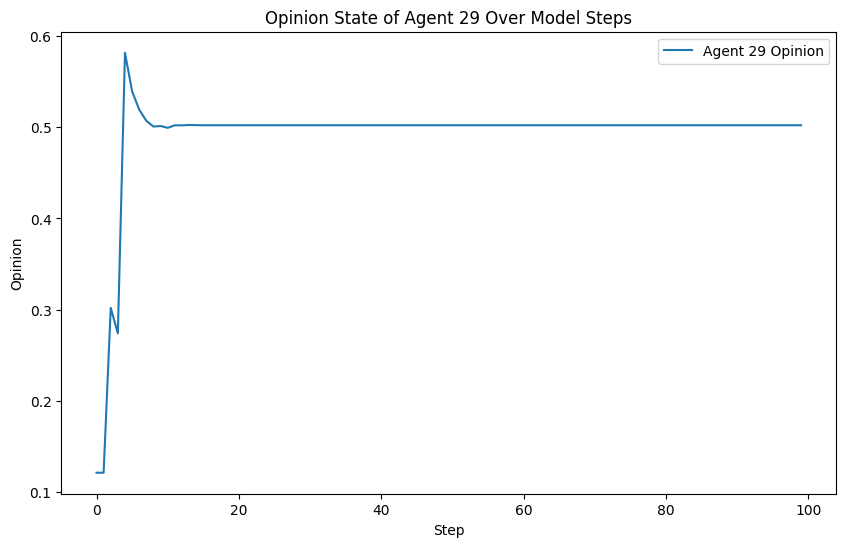

In [10]:
# Create a plot for the opinion state of a single agent over the model steps [Your code here]

import matplotlib.pyplot as plt

unique_ids = agent_out.index.get_level_values("AgentID").unique()
agent_id = random.choice(unique_ids)
agent_data = agent_out.xs(agent_id, level="AgentID")

plt.figure(figsize=(10, 6))
plt.plot(agent_data.index, agent_data['Opinion'], label='Agent {} Opinion'.format(agent_id))
plt.xlabel('Step')
plt.ylabel('Opinion')
plt.title('Opinion State of Agent {} Over Model Steps'.format(agent_id))
plt.legend()
plt.show()

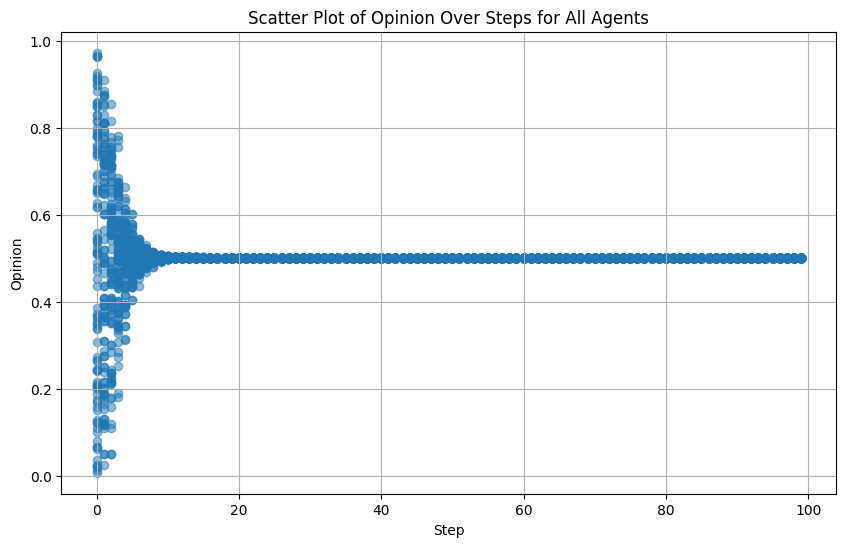

In [11]:
# Create a scatter plot for the opinion state of all agents over the model steps [Your code here]

agent_data_reset_index = agent_out.reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(agent_data_reset_index['Step'], agent_data_reset_index['Opinion'], alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Opinion')
plt.title('Scatter Plot of Opinion Over Steps for All Agents')
plt.grid(True)
plt.show()

## Question 1

1.1 In previous steps you have visualized the bounded confidence model analysis for a high opinion difference treshold (e.g., ``treshold = 0.5``).
Now re-run the analysis for a low opinion difference treshold (e.g., ``treshold = 0.2``) and observe the difference in proportion of converged agents over all agents.

Put your code in the Answer 1.1 box below.

The bounded confidence model ran for 100 steps


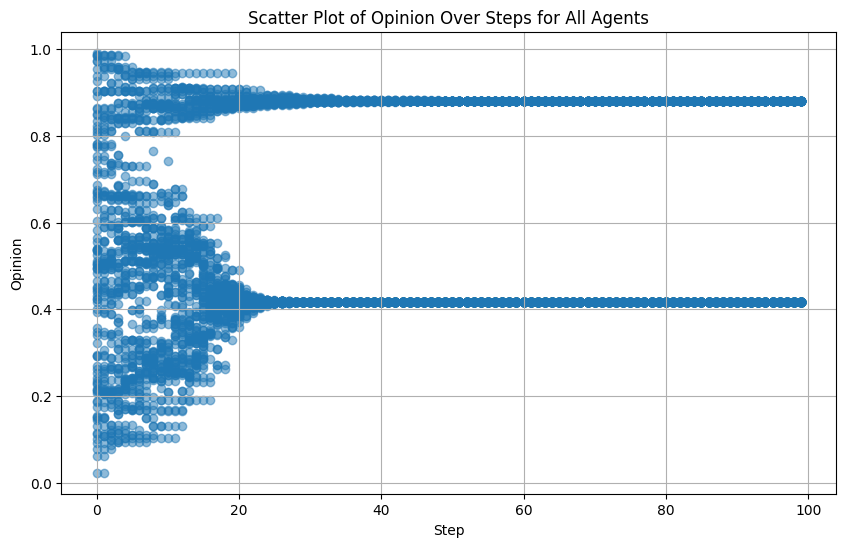

In [12]:
# Answer 1.1 [Your code here]
model = BoundedConfidenceModelAnalysis(100, 0.2, 0.5) # < Add model parameters [Your code here] )

while model.schedule.steps < 100:
    model.step()
                        
print('The bounded confidence model ran for {} steps'.format(model.schedule.steps))

agent_out = model.datacollector.get_agent_vars_dataframe()
agent_data_reset_index = agent_out.reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(agent_data_reset_index['Step'], agent_data_reset_index['Opinion'], alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Opinion')
plt.title('Scatter Plot of Opinion Over Steps for All Agents')
plt.grid(True)
plt.show()


1.2 Qualitatively describe what is this difference between these two outcomes and why?

1.3 Do you notice polarization of opinion?

**Hint:** Your plots should look similar to Figure 1 and Figure 2 in [this paper]
(https://www.worldscientific.com/doi/abs/10.1142/s0219525900000078).

You can also find the paper in the teach center under Readings, Block 2: Opinion dynamics, Deffuant2001.pdf

Put your text in the Answer 1.2 box below.

## Answer 1.2 and 1.3

[Your text answer here]

#### 1.2

In the first figure, for the 0.5 threshold, the agents have closer opinions and are more likely to change their opinions and converge to the same opinion.

In the second figure, for the 0.2 threshold, some agents are too distant from the opinions of others, so they do not converge in one opinion but instead distance themselves into two different ones.

#### 1.3

Yes, there is a polarization in two separated fields.

## Question 2

You have now implemented the bounded confidence model in which agents interact in random pairs with their peers. The opinions of agents are sampled from a uniform distribution and simulated the model for N = 100 agents, tolerance threshold of d = 0.2, and attraction parameter ζ = 0.5, for 100 steps.

2.1 Generate at least 10 scatter plot visualizations of a simulation with these same parameters.

2.2 Visualize a histogram plot of the final number of opinion groups at the last step from those 10 simulations (scatter plots).

Put your code in the Answer 2.1 and 2.2 box below (you can create more code boxes if needed for the plots).

The bounded confidence model ran for 100 steps in run 1


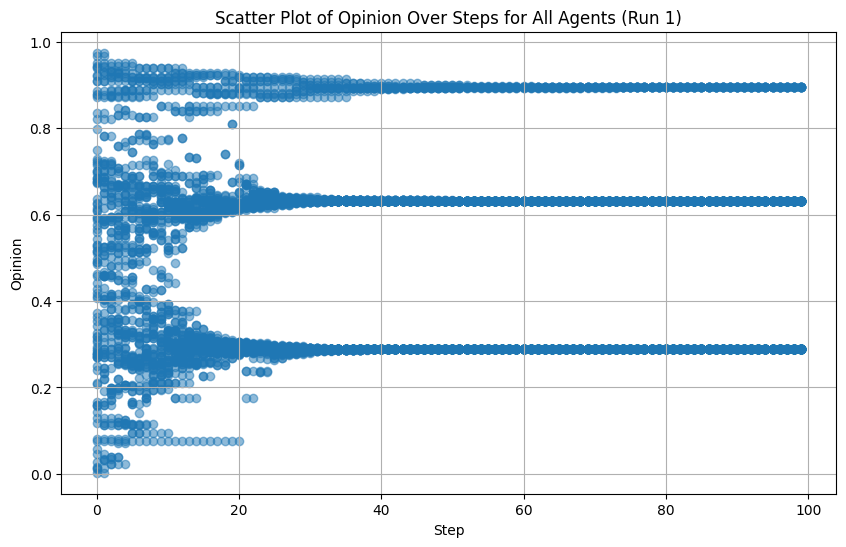

The bounded confidence model ran for 100 steps in run 2


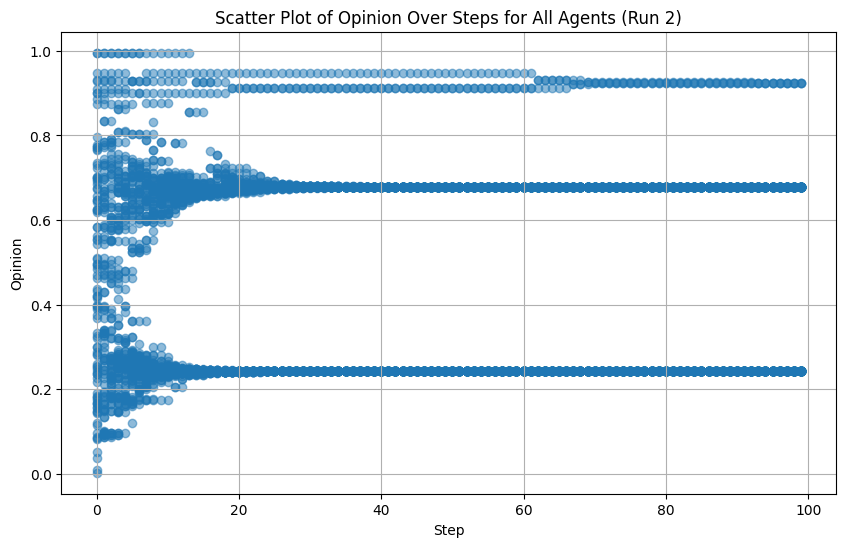

The bounded confidence model ran for 100 steps in run 3


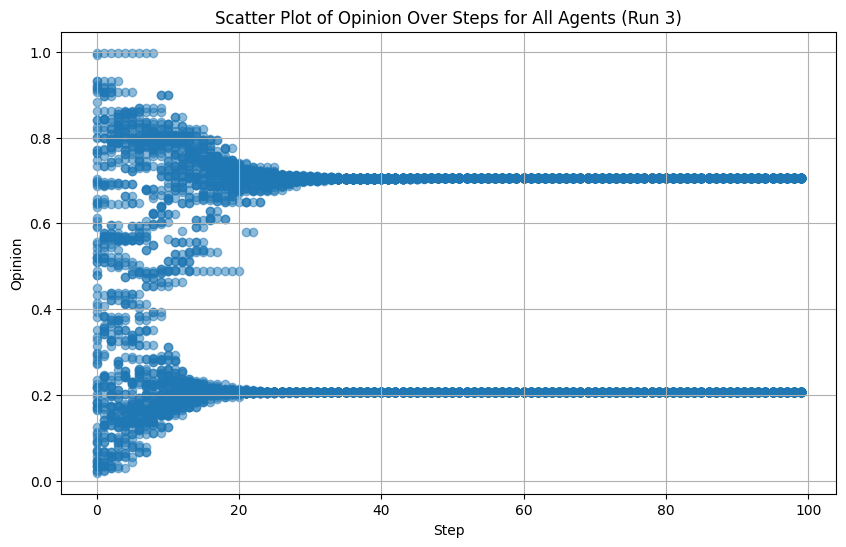

The bounded confidence model ran for 100 steps in run 4


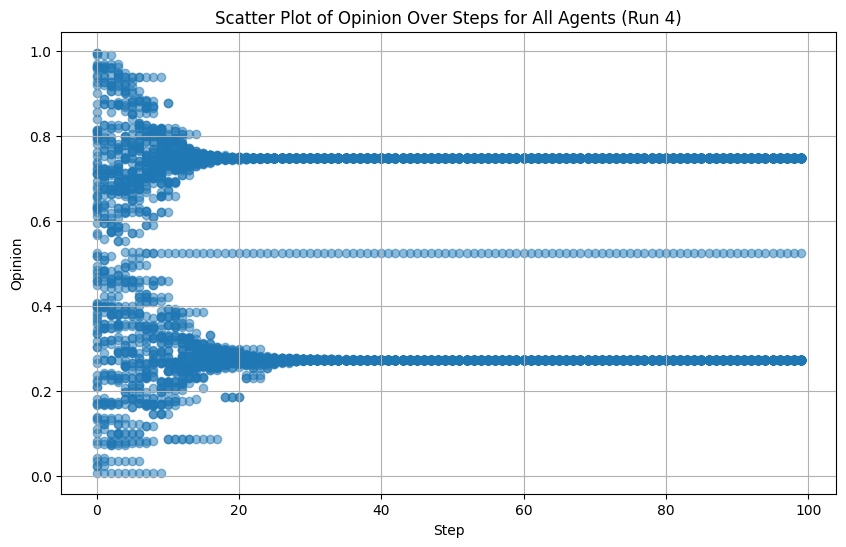

The bounded confidence model ran for 100 steps in run 5


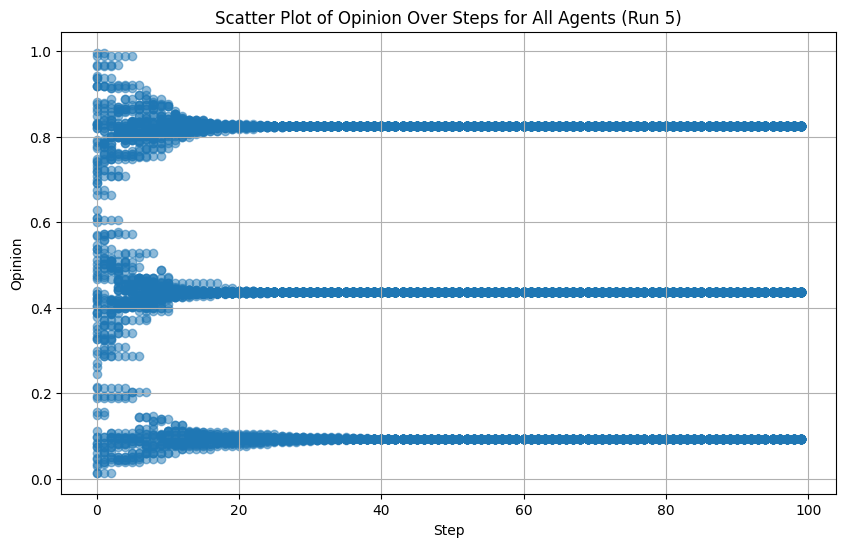

The bounded confidence model ran for 100 steps in run 6


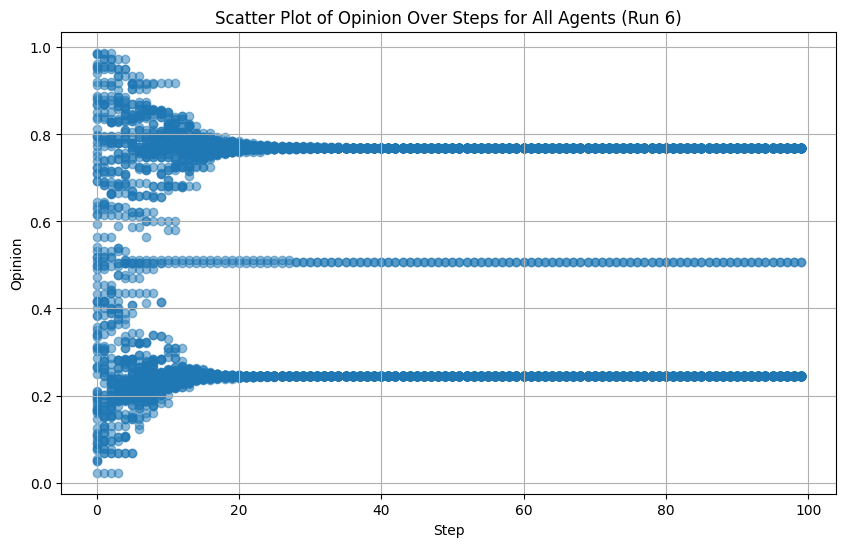

The bounded confidence model ran for 100 steps in run 7


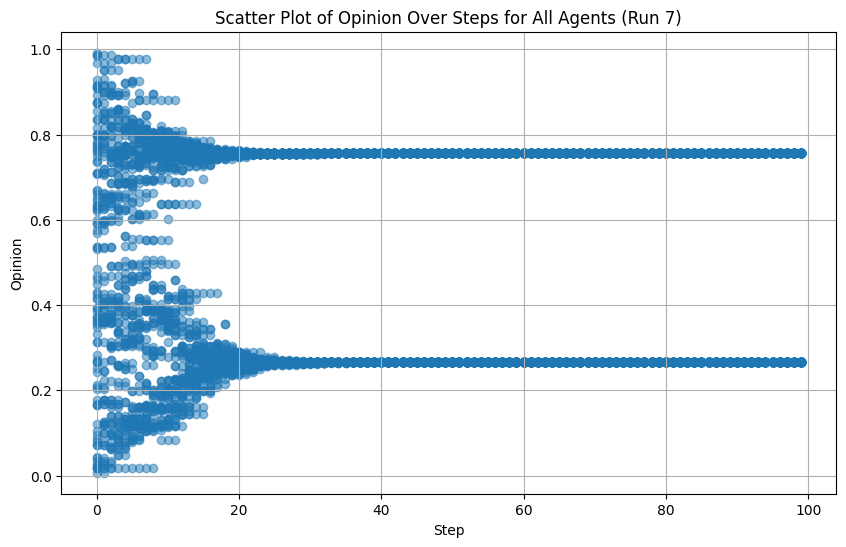

The bounded confidence model ran for 100 steps in run 8


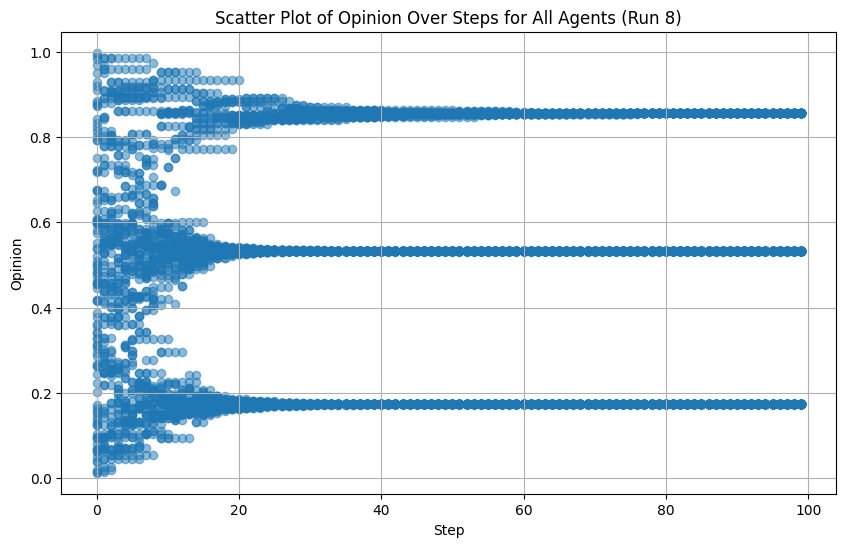

The bounded confidence model ran for 100 steps in run 9


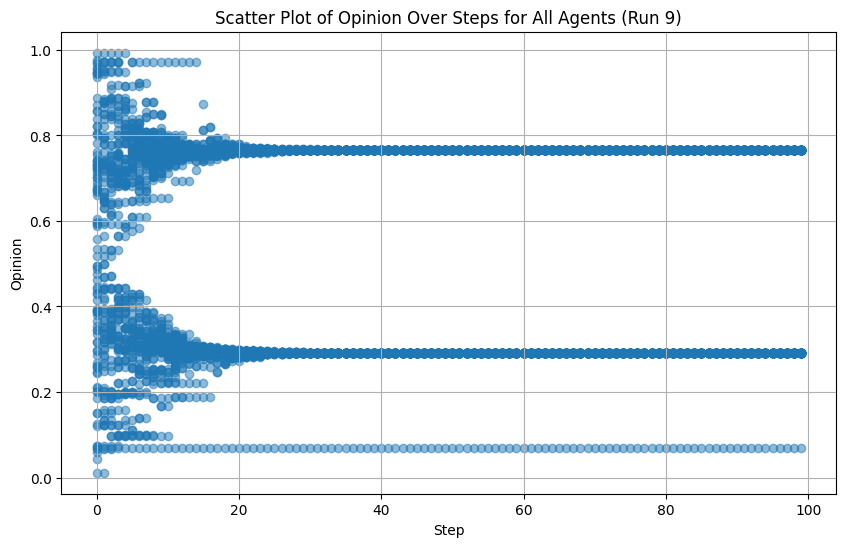

The bounded confidence model ran for 100 steps in run 10


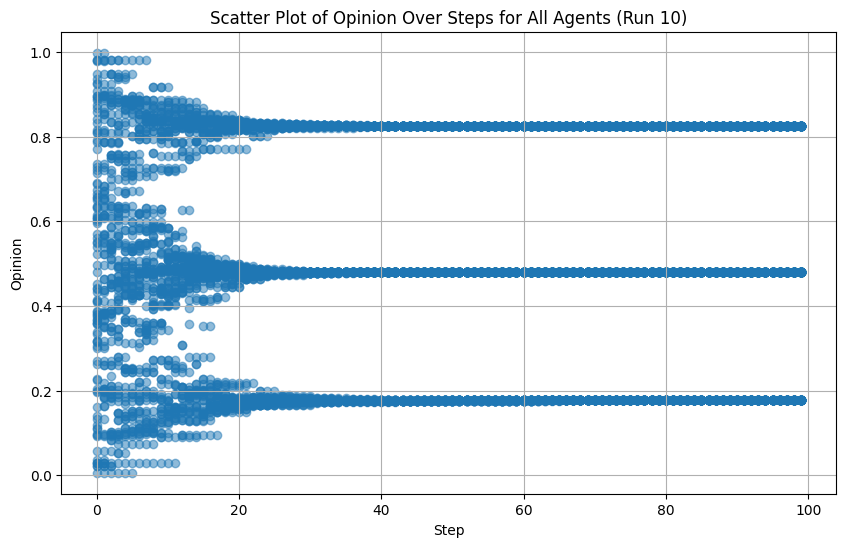

Group Counts for Each Run:
Run 1: 4 opinion groups
Run 2: 4 opinion groups
Run 3: 2 opinion groups
Run 4: 3 opinion groups
Run 5: 3 opinion groups
Run 6: 3 opinion groups
Run 7: 2 opinion groups
Run 8: 3 opinion groups
Run 9: 3 opinion groups
Run 10: 3 opinion groups


In [13]:
# Answer 2.1 and 2.2 [Your code here]

def run_model_plot_count_groups(run_number,group_counts):
    model = BoundedConfidenceModelAnalysis(100, 0.2, 0.5)
    
    while model.schedule.steps < 100:
        model.step()
                            
    print('The bounded confidence model ran for {} steps in run {}'.format(model.schedule.steps, run_number))

    agent_out = model.datacollector.get_agent_vars_dataframe()
    agent_data_reset_index = agent_out.reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.scatter(agent_data_reset_index['Step'], agent_data_reset_index['Opinion'], alpha=0.5)
    plt.xlabel('Step')
    plt.ylabel('Opinion')
    plt.title('Scatter Plot of Opinion Over Steps for All Agents (Run {})'.format(run_number))
    plt.grid(True)
    plt.show()

    number_of_groups = get_number_opinion_groups(model)
    group_counts.append(number_of_groups)

group_counts = []

# Run the model and scatter plot 10 times
for i in range(1, 11):
    run_model_plot_count_groups(i, group_counts)

print("Group Counts for Each Run:")
for i, count in enumerate(group_counts, 1):
    print("Run {}: {} opinion groups".format(i, count))

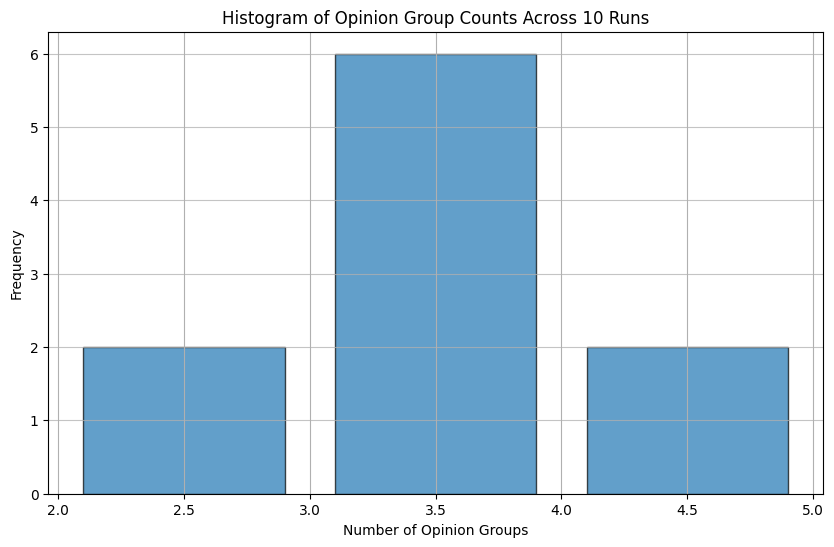

In [14]:
#2.2 Plot the histogram

plt.figure(figsize=(10, 6))
plt.hist(group_counts, bins=range(min(group_counts), max(group_counts)+2), edgecolor='black', alpha=0.7, rwidth=0.8)
plt.xlabel('Number of Opinion Groups')
plt.ylabel('Frequency')
plt.title('Histogram of Opinion Group Counts Across 10 Runs')
plt.grid(axis='y', alpha=0.75)
plt.grid(True)
plt.show()


2.3 Do you always get the same number of groups?

2.4 What is the most typical number of groups that you get?

2.5 Do you ever get consensus?

2.6 Can you identify ”wings” of agents that get stuck towards the ends of the opinion scale?

Put your text in the Answer 2.3, 2.4, 2.5, 2.6 box below.

## Answer 2.3, 2.4, 2.5, 2.6

[Your text answer here]

#### 2.3

No

#### 2.4

3

#### 2.5

No

#### 2.6

No

### Batch Run

Like we mentioned above, you usually won’t run a model only once, but
multiple times, with fixed parameters to find the overall distributions
the model generates, and with varying parameters to analyze how they
drive the model’s outputs and behaviors. Instead of needing to write
nested for-loops for each model, Mesa provides a ``batch_run`` function
which automates it for you.

The batch runner also requires an additional variable ``self.running``
for the Model class. This variable enables conditional shut off of
the model once a condition is met.

# 7. Create iteration Batch of the Agent/Model

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- Specify all model-level parameters of its __init__ function
- Number of agents is given already as 100
- Specify: ``convergence = 0.5`` and ``treshold`` as [0.1, 0.6, equally spaced 11 values]

**Hint**: You can use ``linspace()`` method from the numpy lbrary as follows:

``
import numpy as np
np.linspace(0.1,0.6,11)
``

In [15]:
import numpy as np

params = {"N": 100, "convergence" : 0.5, "threshold" : np.linspace(0.1, 0.6, 11)} # < Add model parameters [Your code here] } 
print(params)




{'N': 100, 'convergence': 0.5, 'threshold': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ])}


# 8. Run the Agent/Model Batch

### Running the model

We call ``batch_run`` with the following arguments:

* ``model_cls``

  The model class that is used for the batch run.

* ``parameters``

  A dictionary containing all the parameters of the model class and
  desired values to use for the batch run as key-value pairs. Each
  value can either be fixed ( e.g. ``{"convergence": 0.5}``)
  or an iterable (e.g. ``{"treshold": np.linspace(0.1,0.6,11)}``). ``batch_run``
  will then generate all possible parameter combinations based on this
  dictionary and run the model ``iterations`` times for each combination.

* ``number_processes``

  Number of processors used to run the sweep in parallel. Optional.
  If not specified, defaults to use all the available processors.

  Note: Multiprocessing does make debugging challenging. If your
  parameter sweeps are resulting in unexpected errors set ``number_processes = 1``.
  
  Also, if your batcher is stuck and is not running for some reason, try also setting ``number_processes = 1``, since this issue might also be related to multiprocessing issues.

* ``iterations``

  The number of iterations to run each parameter combination for. Optional.
  If not specified, defaults to 1.

* ``data_collection_period``

  The length of the period (number of steps) after which the model and
  agent reporters collect data. Optional. If not specified, defaults to -1,
  i.e. only at the end of each episode.

* ``max_steps``

  The maximum number of time steps after which the model halts. An episode
  does either end when ``self.running`` of the model class is set to
  ``False`` or when ``model.schedule.steps == max_steps`` is reached.
  Optional. If not specified, defaults to 1000.

* ``display_progress``

  Display the batch run progress. Optional. If not specified, defaults to ``True``.

In the following example, we hold the height and width fixed, and vary
the homophily treshold of agents. We tell the batch runner to run 10 instantiations
of the model with each number of agents, and to run each for 200 steps.

At the last step of the model (i.e., `data_collection_period=-1`), the datacollector will collect and store the model-level proportion of engaged agents, as well as each agent’s engaged state, associating each with the last step.

In [16]:
# If your batcher is stuck and is not running for some reason, try setting number_processes = 1

from mesa.batchrunner import batch_run

print(params)
results = batch_run(
    BoundedConfidenceModelAnalysis,
    parameters=params,
    iterations=10,
    max_steps=100,
    number_processes=1,
    data_collection_period=-1,
    display_progress=True,
)

{'N': 100, 'convergence': 0.5, 'threshold': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ])}


  0%|          | 0/110 [00:00<?, ?it/s]

# 9. Run the Batch data Analysis

### Data visualization

First, we want to take a closer look at how the number of opinion groups at the end of each episode changes as we increase the opinion difference threshold.
For this, we group our data on the ``RunId`` identifier and get a single value per ``RunId`` using a median.
Our results to only contain the data of engagement ratio for the entire population at the final step of each episode and then box-plot the values for the engagement ratio over the standard deviation of engagement tresholds.
Notice there are 10 values for each sigma value since we set ``iterations=10`` when calling the batch run.

In [17]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df

,RunId,iteration,Step,N,convergence,threshold,Opinion_groups,AgentID,Opinion
0,0,0,100,100,0.5,0.1,8,45,0.695026
1,0,0,100,100,0.5,0.1,8,40,0.372600
2,0,0,100,100,0.5,0.1,8,32,0.695027
3,0,0,100,100,0.5,0.1,8,17,0.695027
4,0,0,100,100,0.5,0.1,8,4,0.372600
...,...,...,...,...,...,...,...,...,...
10995,109,9,100,100,0.5,0.6,1,29,0.523361
10996,109,9,100,100,0.5,0.6,1,81,0.523361
10997,109,9,100,100,0.5,0.6,1,94,0.523361
10998,109,9,100,100,0.5,0.6,1,28,0.523361


In [18]:
results_df.groupby(by=["RunId", "iteration", "Step"]).median()

,,,N,convergence,threshold,Opinion_groups,AgentID,Opinion
RunId,iteration,Step,,,,,,
0,0,100,100.0,0.5,0.10,8.0,49.5,0.695026
1,0,100,100.0,0.5,0.15,3.0,49.5,0.546572
2,0,100,100.0,0.5,0.20,3.0,49.5,0.208946
3,0,100,100.0,0.5,0.25,2.0,49.5,0.387979
4,0,100,100.0,0.5,0.30,1.0,49.5,0.484498
...,...,...,...,...,...,...,...,...
105,9,100,100.0,0.5,0.40,2.0,49.5,0.438727
106,9,100,100.0,0.5,0.45,1.0,49.5,0.503515
107,9,100,100.0,0.5,0.50,1.0,49.5,0.502834


## Question 3

The simulation above should have ran for 10 times for treshold values of d from 0.1 to 0.6 by increases of 0.05.

3.1 Your final task is to investigate how the opinion difference threshold influences the final number of opinion groups, using a box plot.
Box plot should be able to plot the average opinion group outcome for each treshold value.

**Hint:** Your plot should present similar information (but different visualization) to Figure 4 in the paper you can find in Teach Center readings [this paper](https://www.worldscientific.com/doi/abs/10.1142/s0219525900000078).

Put your code in the Answer 3.1 box below.

### **Hint:** At the location ``# Create a box-plot for the number of opinion groups over the opinion difference threshold values [Your code here]`` you have to implement:

- plot the boxplot of number of opinion groups over the opinion difference threshold values from models data you have collected
- using the Pandas ``.boxplot()`` method
- group engagement ratio values by ``treshold``
- plot the ``Opinion_groups`` column

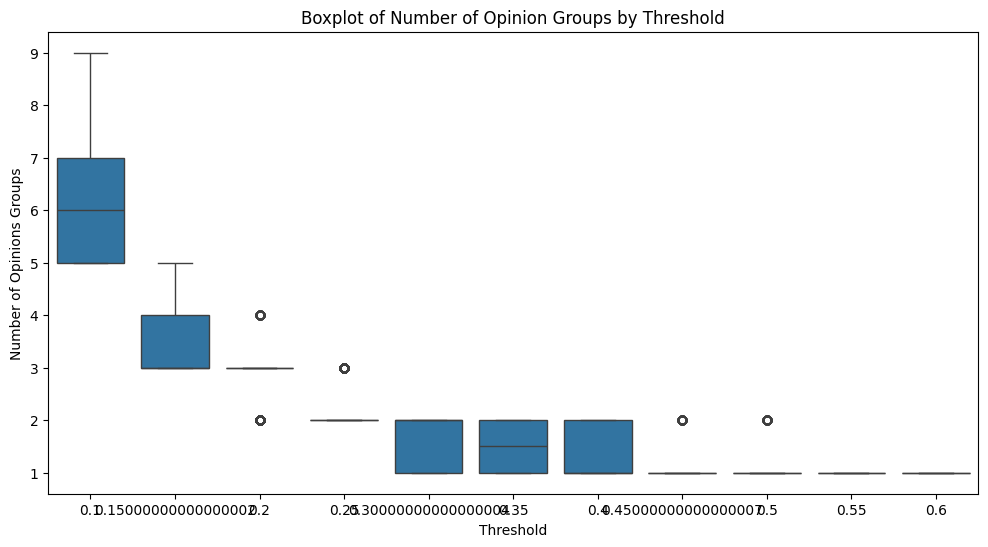

In [19]:
# Answer 3.1 [Your code here]
# Create a box-plot for the number of opinion groups over the opinion difference threshold values [Your code here]
# Create a new column for threshold grouping
import seaborn as sns


# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='threshold', y='Opinion_groups', data=results_df)
plt.xlabel('Threshold')
plt.ylabel('Number of Opinions Groups')
plt.title('Boxplot of Number of Opinion Groups by Threshold')
plt.show()

3.2 What is the approximate relationship between the final number of opinion groups and the opinion difference threshold d?

3.3 Do you sometimes have more groups than you expected? Why?

3.4 Are there any treshold values for which you always get consensus?

Put your text in the Answer 3.2, 3.3, 3.4 box below.

## Answer 3.2, 3.3, 3.4

3.2 It does seem like there is a linear relationship. The groups are decreasing by the threshold
3.3 I do not think there are any more groups than expected
3.4 For thresholds over 0.40 it seems like you always get consensus, since the group is 1. here. 

# Appendix

# Visualization using grid space

If we would like to visualize this opinion dynamics model, we need to consider that agents only interact among connected agents when their opinion are already close enough; otherwise they do not even bother to discuss.

We now add to our model a condition on neighborhood: agents only interact if they are directly con- nected through a social pre-existing relation. Any agent can only interact with his four connected neighbours ( N, S, E and W) - von Neuman.

These are specific changes from the basic model:

### At the location ``# 1 Initialization [Your code here]`` you have to implement:

Each agent has:
- position - on the grid used to initialize unique ID
- opinion - an agent's initial opinion which will change during the simulation

### At the location ``# 3 Randomly chose agent [Your code here]`` you have to implement:

- get a list of neighbours (use van Neuman by `moore=False`)
- select one random agent from the list to interact

In [20]:
class BoundedConfidenceAgentSpace(Agent):
    
    def __init__(self, unique_id, pos, opinion, model):
        '''
         Create a new bounded confidence agent.

         Args:
            unique_id: Unique identifier for the agent
            opinion: An agent's initial opinion
        '''
        
        super().__init__(unique_id, model)
        
        # 1 Initialization [Your code here]
        self.opinion = opinion
        self.pos = pos

    def get_von_neumann_neighbors(self):
        '''
        Get the Von Neumann neighbors of the agent.
        '''
        
        neighbors = self.model.grid.get_neighbors(self.pos, moore=False, include_center=False)
        return neighbors
        
    # 2 Step agent function    
    def step(self):
        '''
        Run one step of the agent.
        '''
        
        # 3 Randomly chose agent [Your code here]
        
        agents = self.model.schedule.agents
        neighbors = self.get_von_neumann_neighbors()
        
        if neighbors:
            selected_agent = random.choice(neighbors)
            self.interact(selected_agent)
            
     
    # 4 Evaluate agents difference of opinion [Your code here]
    def interact(self, other_agent):
        opinion_d = abs(self.opinion - other_agent.opinion)        
        
        # 5 Re-adjust agents opinions [Your code here]
        convergence = self.model.convergence
        threshold = self.model.threshold
        
        if opinion_d < threshold:
            new_opinion_self = self.opinion + convergence *(other_agent.opinion - self.opinion)
            new_opinion_other = other_agent.opinion + convergence *(self.opinion - other_agent.opinion)

            self.opinion = new_opinion_self
            other_agent.opinion = new_opinion_other


## Adding space

Many ABMs have a spatial element, with agents moving around and
interacting with nearby neighbors. Mesa currently supports two overall
kinds of spaces: grid, and continuous. Grids are divided into cells, and
agents can only be on a particular cell, like pieces on a chess board.
Continuous space, in contrast, allows agents to have any arbitrary
position. Both grids and continuous spaces are frequently
[toroidal](https://en.wikipedia.org/wiki/Toroidal_graph), meaning
that the edges wrap around, with cells on the right edge connected to
those on the left edge, and the top to the bottom. This prevents some
cells having fewer neighbors than others, or agents being able to go off
the edge of the environment.

Let’s add a simple spatial element to our model by putting our agents on
a grid and make them walk around based on the happines and homophily tershold.

Mesa has two main types of grids: ``SingleGrid`` and ``MultiGrid``.
``SingleGrid`` enforces at most one agent per cell; ``MultiGrid`` allows
multiple agents to be in the same cell. Since we want one agent per cell, we use ``SingleGrid``.

`from mesa.space import SingleGrid`

We instantiate a grid with width and height parameters, and a boolean as
to whether the grid is toroidal. Let’s make width and height model
parameters, in addition to the number of agents, and have the grid
always be toroidal. We can place agents on a grid with the grid’s
``place_agent`` method, which takes an agent and an (x, y) tuple of the
coordinates to place the agent.

Under the hood, each agent’s position is stored in two ways: the agent
is contained in the grid in the cell it is currently in, and the agent
has a ``pos`` variable with an (x, y) coordinate tuple. The
``place_agent`` method adds the coordinate to the agent automatically.

### At the location ``# < Add model parameters [Your code here] })`` you have to implement:

- Specify all model-level parameters of its __init__ function
- height and width are given already as 30 x 30
- Specify: ``convergence = 0.5`` and ``treshold`` yourself [0.1,0.6].

In [21]:
from mesa.space import SingleGrid

class BoundedConfidenceModelSpace(Model):
    
    def __init__(self, height, width, N, threshold, convergence):
        '''
        Create a new bounded confidence model.

         Args:
            N: how many agents the model contains
            threshold: opinion difference threshold. Floating value from 0 to 1.
            convergence: convergence parameter. Floating value from 0 to 0.5.
        '''
        
        super().__init__()
        
        # 1 Initialization [Your code here]
        self.height = height
        self.width = width
        self.N = N
        self.threshold = threshold
        self.convergence = convergence
        self.grid = SingleGrid(width, height, torus=True)
        self.schedule = RandomActivation(self)
    
        
        self.datacollector = DataCollector(    # < Note that we have both an agent and model data collector
            model_reporters={"Threshold": "threshold"}, agent_reporters={"Opinion": "opinion"}
        )
        
        # 2 Create agents [Your code here]
            
            
        for i in range(self.N):
            pos = (self.random.randrange(self.grid.width), self.random.randrange(self.grid.height))
            while not self.grid.is_cell_empty(pos):
                pos = (self.random.randrange(self.grid.width), self.random.randrange(self.grid.height))
            opinion = float(self.random.random())
            agent = BoundedConfidenceAgentSpace(self.next_id(), pos, opinion, self)
            self.grid.remove_agent(agent)
            self.grid.place_agent(agent, pos)
            self.schedule.add(agent)
        

    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        
        # 3 Step model function
        self.datacollector.collect(self)
        self.schedule.step()

In [22]:
model = BoundedConfidenceModelSpace(30, 30, 100, 0.5, 0.5)# < Add model parameters [Your code here] )

while model.schedule.steps < 100:
    model.step()
                            
print('The bounded confidence model ran for {} steps'.format(model.schedule.steps))

The bounded confidence model ran for 100 steps


In [23]:
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer


def agent_portrayal(agent):
    portrayal = {"Shape": "circle",
                 "Filled": "true",
                 "Layer": 0,
                 "r": 0.8}
    
    # 1 Color the agents based on their type to Red and Blue color
    portrayal["Color"] = "rgba("+ str(int(agent.opinion * 256)) +",128,128,1.0)"
        
    return portrayal

grid = CanvasGrid(agent_portrayal, 30, 30, 500, 500)
server = ModularServer(BoundedConfidenceModelSpace,
                       [grid],
                       "Bounded Confidence Model",
                       {"width":30, "height":30, "N":900, "convergence": 0.5, "threshold": 0.35}) # < Add model parameters [Your code here] })


# 4. Run the Agent/Model Visualization

NOTE: Runtime server error is normal and expected when running visualization code below. This visualization code was made for command line execution (not explicitly for Jupyter Notebooks), so we are **forcing** it's use.

Just make sure to increment the port number counter each visualization run, to be able to use it.

In [24]:
server.port = 8561 # The default 8521 - increase the counter as you run the visalizations
server.launch()


Interface starting at http://127.0.0.1:8561


RuntimeError: This event loop is already running

Socket opened!
{"type":"reset"}


## Question 4

After the visualization of the opinion dynamics mixing **across a social network**, investigate and eyeball the following question (make sure you run the model long enough for the convergence to happen, and you are able to observe extreme opinions):

4.1 What is the (aproximate) lowest critical value of the opinion difference threshold d where you would notice isolated agents which have “extremists” opinions?

**Hint** In the given paper, there is a discussion on the tresholds for the Mixing across a social network  - grid model.

Put your text in the Answer 4.1 box below.

## Answer 4.1

[Your text answer here]

The aproximate lowest critical value of the opinion difference threshold d where we would notice isolated agents which have “extremists” opinions is **0.35**. At 0.3 there is still a second cluster.